## 0b

In [93]:
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Input, Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from tensorflow.keras.regularizers import l2
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.applications import Xception
from tensorflow.keras.layers import GlobalAveragePooling2D, Dense, Dropout
from tensorflow.keras.optimizers import Adam

In [94]:
from pathlib import Path
import numpy as np
from matplotlib import pyplot as plt
import re
import os


raw_data_path = Path("../data/cats_and_dogs")
test_path = raw_data_path/"test"/"test"
train_path = raw_data_path/"train"/"train"

In [95]:
train_list = list(train_path.iterdir())


In [96]:
images = np.random.choice(train_list, 10)
pattern = r"\b\w{3}\b"
labels = [re.findall(pattern, path.name)[0] for path in images]

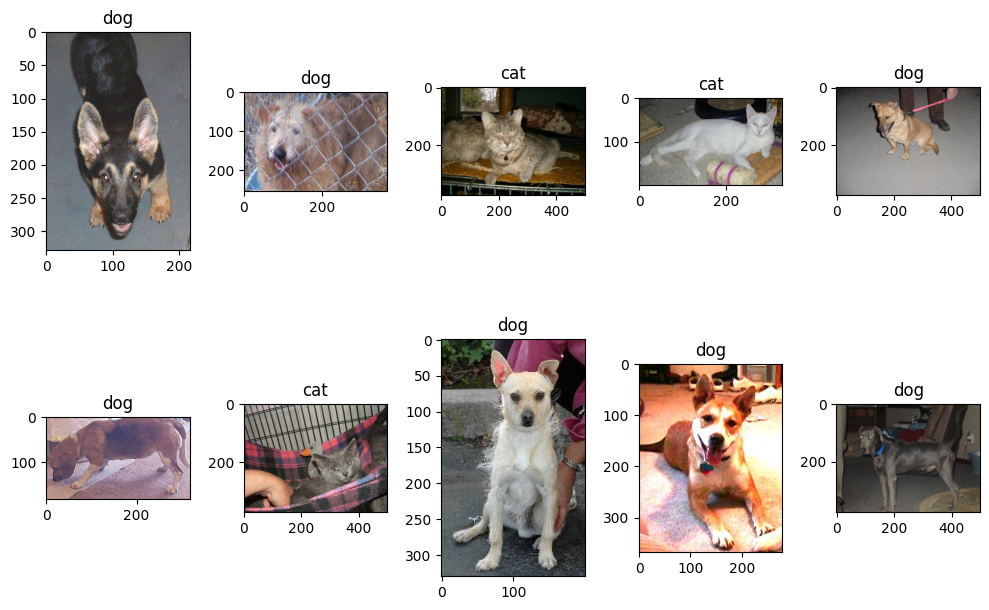

In [97]:
fig, axes= plt.subplots(2, 5, figsize= (10,7))
for i, ax in enumerate(axes.flatten()):
    image= plt.imread(images[i])       # reads as image
    ax.imshow(image)                    # showing image
    ax.set_title(labels[i])
    
fig.tight_layout()  

## 0c

In [98]:
currentPath = Path("")
currentPath

WindowsPath('.')

In [99]:
#currentPath = Path("../data/cat_dog_filtered")


# Folders for small data
experimental_small_path= currentPath/"experiment_small_data"
experimental_small_path.mkdir(exist_ok=True)

experimental_small_test_path= experimental_small_path/"test"
experimental_small_test_path.mkdir(exist_ok=True)

experimental_small_train_path= experimental_small_path/"train"
experimental_small_train_path.mkdir(exist_ok=True)

experimental_small_val_path= experimental_small_path/"val"
experimental_small_val_path.mkdir(exist_ok=True)

# Folders for tiny data

experimental_tiny_path= currentPath/"experiment_tiny_data"
experimental_tiny_path.mkdir(exist_ok=True)

experimental_tiny_train_path= experimental_tiny_path/"train"
experimental_tiny_train_path.mkdir(exist_ok=True)

experimental_tiny_test_path= experimental_tiny_path/"test"
experimental_tiny_test_path.mkdir(exist_ok=True)

experimental_tiny_val_path= experimental_tiny_path/"val"
experimental_tiny_val_path.mkdir(exist_ok=True)

# Folders for original data

original_path = currentPath/"original_data"
original_path.mkdir(exist_ok=True)

original_test = original_path/"test"/"test"
original_test.mkdir(parents=True, exist_ok=True)

original_train = original_path/"train"/"train"
original_train.mkdir(parents=True, exist_ok=True)

In [100]:
import shutil
import stat
def clear_folder(folder_path):
    folder = Path(folder_path)
    for item in folder.iterdir():
        folder = Path(item)
        for test in folder.iterdir():
            #os.chmod(test, stat.S_IWRITE)

            if test.is_dir():
                shutil.rmtree(test)
            else:
                test.unlink()
                


In [101]:
clear_folder(experimental_small_path)
clear_folder(experimental_tiny_path)

## 0d

In [102]:
import random

def cat_dog(image_list:list, amount:int):
    total_dogs= [dog for dog in image_list if "dog" in dog.name]
    
    total_cats= [cat for cat in image_list if "cat" in cat.name]
    
    random_numbers = random.sample(range(7501), 2500)

    train_amount = int(0.32*amount)
    train = list()
    for i in range(train_amount):
        train.append(total_dogs[random_numbers[i]])
        train.append(total_cats[random_numbers[i]])
        random_numbers.remove(random_numbers[i])
        
    val_amount = int(0.08*amount)
    val = list()
    for i in range(val_amount):
        val.append(total_dogs[random_numbers[i]])
        val.append(total_cats[random_numbers[i]])
        random_numbers.remove(random_numbers[i])
        
    test_amount = int(0.1*amount)
    test = list()
    for i in range(test_amount):
        test.append(total_dogs[random_numbers[i]])
        test.append(total_cats[random_numbers[i]])
        random_numbers.remove(random_numbers[i])
        
    #dog_train_amount = random_numbers[:0.32*amount]
    #cat_train_amount = random_numbers[0.32*amount:0.64*amount]
    
    #dog_val_amount = random_numbers[0.64*amount:0.72*amount]
    #cat_val_amount = random_numbers[0.72*amount*0.80*amount]
    
    #dog_test_amount = random_numbers[0.80*amount:0.90*amount]
    #cat_test_amount = random_numbers[0.90*amount:amount]
    
    return train, val, test
    
    

In [103]:
train_data_small, val_data_small, test_data_small = cat_dog(train_list, 2500)
train_data_tiny,val_data_tiny, test_data_tiny = cat_dog(train_list, 250)

In [104]:
import shutil
def image_copier(dest_path, dataset):
    if not os.listdir(dest_path):
        for path in dataset:
                shutil.copy(path, dest_path)
        
    else:
        print("The folder is not empty")


In [105]:
image_copier(experimental_small_test_path, test_data_small)
image_copier(experimental_small_train_path, train_data_small)
image_copier(experimental_small_val_path, val_data_small)

image_copier(experimental_tiny_test_path, test_data_tiny)
image_copier(experimental_tiny_train_path, train_data_tiny)
image_copier(experimental_tiny_val_path, val_data_tiny)

In [106]:
def labeler(data):
    labels = []
    images = []
    for path in data:    # setting labels 1 for dog, 0 for cat
        label = 1 if "dog" in path.name else 0
        labels.append(label)
        
        image = plt.imread(str(path))
        images.append(image)
    return images, np.array(labels)

## 0e

In [107]:
test_list_small = list(experimental_small_test_path.iterdir())
train_list_small = list(experimental_small_train_path.iterdir())
val_list_small = list(experimental_small_val_path.iterdir())

test_list_tiny = list(experimental_tiny_test_path.iterdir())
train_list_tiny = list(experimental_tiny_train_path.iterdir())
val_list_tiny = list(experimental_tiny_val_path.iterdir())

In [108]:
random.shuffle(test_list_small)
random.shuffle(train_list_small)
random.shuffle(val_list_small)
random.shuffle(test_list_tiny)
random.shuffle(train_list_tiny)
random.shuffle(val_list_tiny)
X_test_small, y_test_small = labeler(test_list_small)
X_test_tiny, y_test_tiny = labeler(test_list_tiny)
X_train_small, y_train_small = labeler(train_list_small)
X_train_tiny, y_train_tiny = labeler(train_list_tiny)
X_val_small, y_val_small = labeler(val_list_small)
X_val_tiny, y_val_tiny = labeler(val_list_tiny)

In [109]:
import pandas as pd
import seaborn as sns
def plot(images, labels):
    df = pd.DataFrame({"image": images, "label": labels})
    df["count"] = df["label"].sum()
    sns.barplot(data=df, x="label", y="count", palette=["#0398fc", "orange"])

## Small list

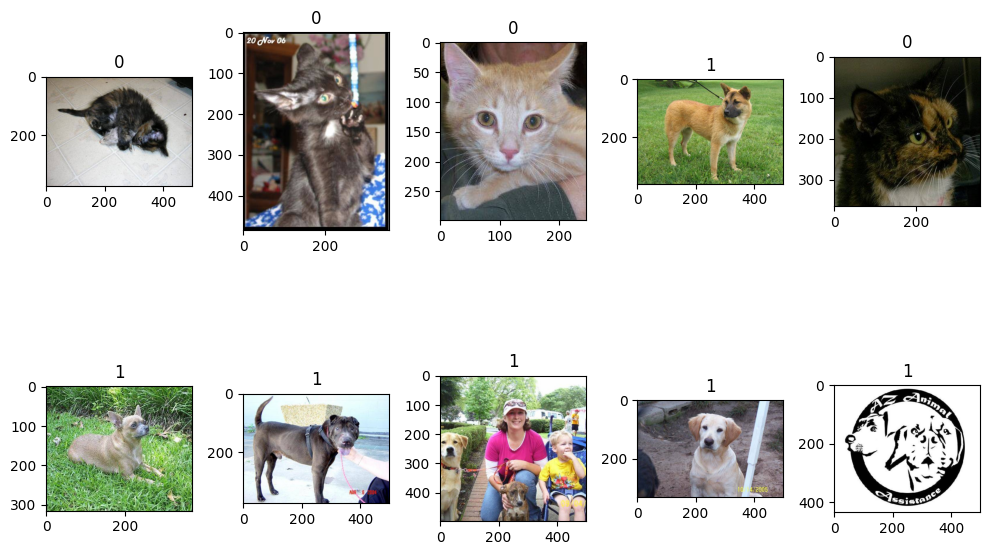

In [110]:
fig, axes= plt.subplots(2, 5, figsize= (10,7))

for i, ax in enumerate(axes.flatten()):
    image = X_train_small[i]   
    ax.imshow(image)                   
    ax.set_title(y_train_small[i])
    
fig.tight_layout()  

C:\Users\hampu\AppData\Local\Temp\ipykernel_4292\3526214338.py:6: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




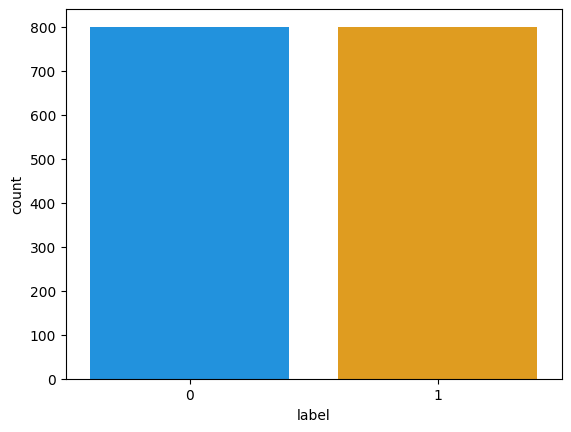

In [111]:
plot(X_train_small, y_train_small)

## Tiny list

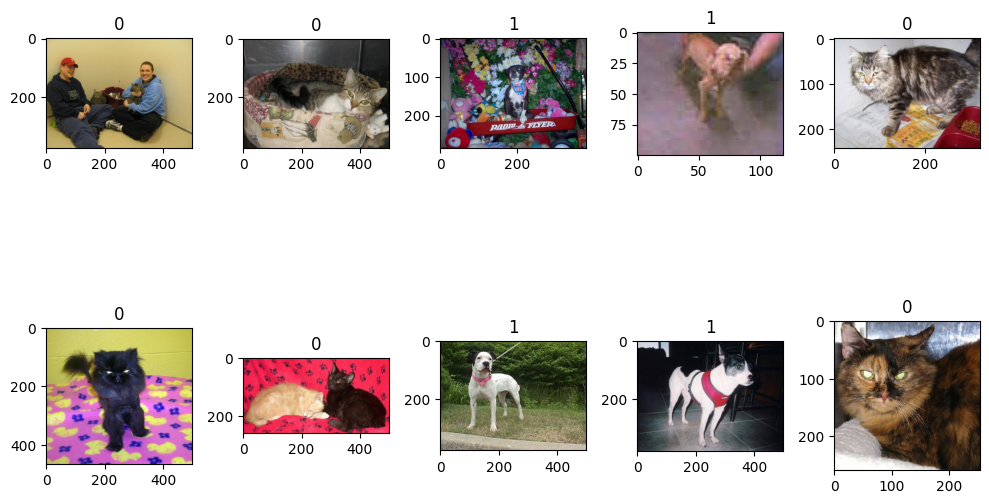

In [112]:
fig, axes= plt.subplots(2, 5, figsize= (10,7))

for i, ax in enumerate(axes.flatten()):
    image = X_train_tiny[i]   
    ax.imshow(image)                   
    ax.set_title(y_train_tiny[i])
    
fig.tight_layout()  

C:\Users\hampu\AppData\Local\Temp\ipykernel_4292\3526214338.py:6: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




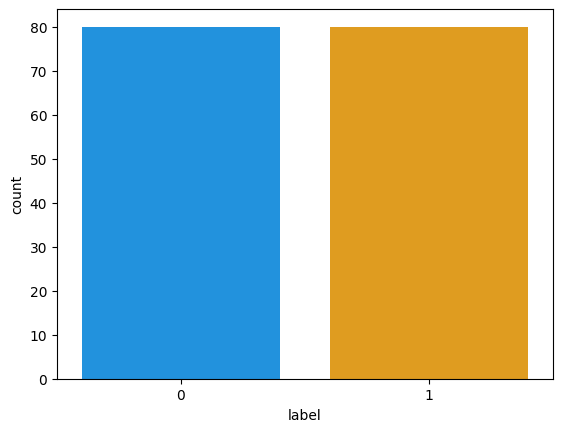

In [113]:
plot(X_train_tiny, y_train_tiny)

In [114]:
# Create a list with index for each dataset
import plotly.graph_objects as go
train_index = list(range(len(y_train_small)))

fig = go.Figure()

# Dataset
fig.add_trace(go.Scatter(x=train_index, y=y_train_small, mode='markers', name='Train'))


fig.update_layout(title='Dataset with index',
                  xaxis_title='Index',
                  yaxis_title='Label',
                  yaxis=dict(
                      tickvals=[0, 1],
                      ticktext=['Cat', 'Dog']
                  ))

fig.show()

## 1a

In [115]:
def image_size(data):
    image_sizes = []
    
    for image in data:
        image_size = image.shape[:2]
        image_sizes.append(image_size)
    return image_sizes

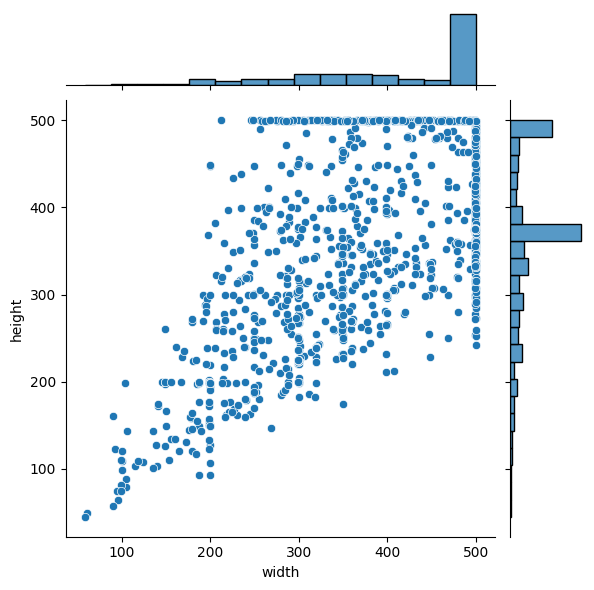

In [116]:
train_sizes_small = image_size(X_train_small)

df_train_sizes_small= pd.DataFrame( data= train_sizes_small, columns= ["height", "width"])

sns.jointplot(data = df_train_sizes_small, x = "width", y = "height")

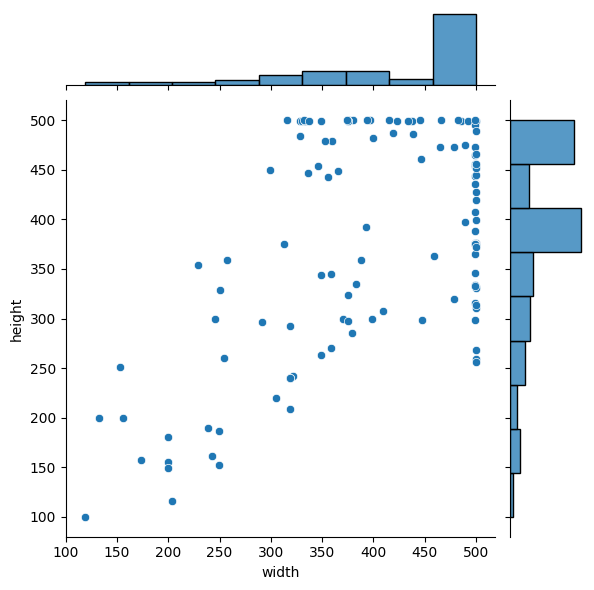

In [117]:
train_sizes_tiny = image_size(X_train_tiny)
df_train_sizes_tiny= pd.DataFrame( data= train_sizes_tiny, columns= ["height", "width"])

sns.jointplot(data = df_train_sizes_tiny, x = "width", y = "height")

## 1b

Removed smaller images to get rid of the most blurry ones

In [118]:
train_sizes_small
filtered_train_sizes_small = [size for size in train_sizes_small if size[0] >= 100 and size[1] >= 100]

print(filtered_train_sizes_small)

[(374, 500), (486, 358), (299, 245), (359, 500), (365, 356), (315, 370), (375, 499), (499, 500), (332, 500), (434, 500), (259, 340), (374, 500), (374, 500), (375, 499), (375, 499), (299, 192), (499, 333), (419, 499), (500, 442), (375, 499), (332, 500), (315, 499), (461, 499), (500, 387), (236, 249), (251, 299), (374, 500), (499, 375), (499, 375), (374, 500), (374, 500), (375, 499), (500, 374), (177, 222), (186, 312), (128, 200), (287, 338), (255, 291), (493, 499), (449, 500), (230, 306), (373, 349), (499, 401), (489, 500), (149, 187), (499, 408), (500, 388), (500, 400), (228, 319), (472, 286), (499, 349), (300, 262), (479, 480), (374, 500), (232, 399), (307, 453), (346, 400), (185, 280), (277, 349), (375, 499), (374, 500), (270, 179), (488, 499), (329, 499), (236, 300), (239, 320), (465, 500), (374, 500), (375, 299), (338, 499), (396, 490), (374, 500), (402, 499), (258, 225), (500, 374), (109, 100), (464, 500), (500, 305), (284, 500), (182, 318), (332, 359), (447, 336), (374, 500), (37

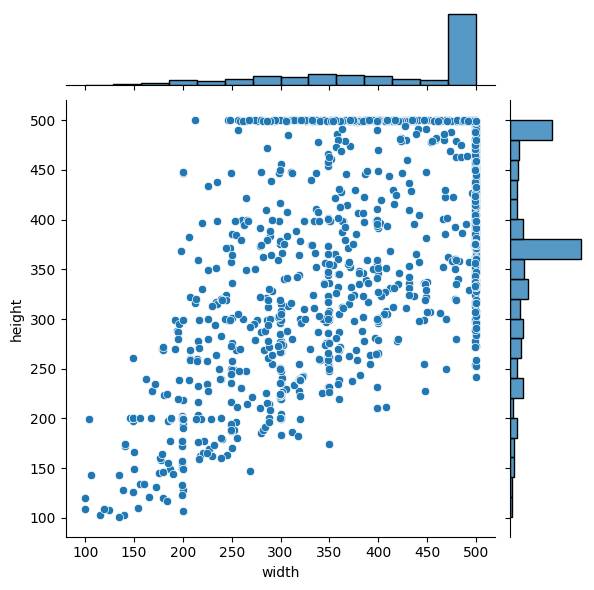

In [119]:

df_train_sizes_small= pd.DataFrame( data= filtered_train_sizes_small, columns= ["height", "width"])

sns.jointplot(data = df_train_sizes_small, x = "width", y = "height")

In [120]:
import cv2
from tensorflow.keras.preprocessing.image import load_img, img_to_array
def prep_images(data_path):
    image_files = list(data_path.glob('*.jpg'))
    labels = []
    images = []
    
    for file in image_files:
        img = cv2.imread(str(file))
        
        if img.shape[0] > 100 and img.shape[1] > 100:
            #print(f"Skipping image {file} due to incorrect resolution: {img.shape}")
            #continue

        # Ändrar storleken på bilden till önskat format
            img = cv2.resize(img, (200, 200))   
            images.append(img)
            label = 1 if 'dog' in file.stem else 0
            labels.append(label)
        
    combined = list(zip(images, labels)) # Help from chatgpt to shuffle without losing labels
    random.shuffle(combined)
    
    shuffled_images, shuffled_labels = zip(*combined)


    images = np.array(shuffled_images)
    labels = np.array(shuffled_labels)
    
    
    return images, labels

def resize_images(data_dir, target_size=(200, 200)):
    data = []
    labels = []
    for img_path in Path(data_dir).glob("*.jpg"):
        img = load_img(img_path, target_size=target_size)
        img_array = img_to_array(img)
        data.append(img_array)
        if 'dog' in img_path.name:
            labels.append(1)
        elif 'cat' in img_path.name:
            labels.append(0)
    return np.array(data), np.array(labels)

In [121]:
X_train_small, y_train_small = prep_images(experimental_small_train_path)
X_train_tiny, y_train_tiny = prep_images(experimental_tiny_train_path)
X_test_small, y_test_small = prep_images(experimental_small_test_path)
X_val_small, y_val_small = prep_images(experimental_small_val_path)




In [122]:
print(X_train_small.shape)
print(X_train_small[30].shape)
print(y_test_small)

(1583, 200, 200, 3)
(200, 200, 3)
[0 1 1 0 0 0 0 1 0 0 0 1 1 1 0 0 1 0 1 0 0 1 1 1 0 0 1 1 1 0 1 0 0 1 0 0 0
 1 0 1 0 0 0 0 1 1 0 1 0 0 0 1 0 0 0 1 0 1 1 1 1 0 0 1 1 0 1 0 1 1 0 0 0 0
 0 1 0 0 1 0 0 1 0 0 0 0 1 1 0 1 1 0 0 1 0 0 1 1 0 1 1 0 0 0 1 1 1 1 1 1 0
 1 1 0 0 0 1 0 0 1 1 1 0 0 1 0 0 0 0 0 1 1 0 0 0 0 1 0 1 0 1 0 0 1 1 1 0 0
 0 0 1 1 0 1 1 1 1 0 0 0 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 0 0 0 1 1 1 1 1 0
 0 1 1 1 1 1 0 1 0 1 1 1 0 1 1 1 0 0 0 0 1 0 1 0 1 1 0 1 0 0 1 1 0 1 1 1 1
 0 1 1 0 1 0 0 1 1 1 1 1 0 0 1 0 0 0 0 0 0 1 0 1 0 0 1 0 0 1 1 1 1 1 1 1 1
 0 1 0 1 1 0 0 0 0 1 0 0 1 1 0 0 0 0 0 1 1 1 0 0 1 0 1 1 0 0 0 0 1 0 1 1 0
 0 1 0 0 1 0 0 1 0 1 0 0 0 1 1 0 1 1 0 1 0 0 0 1 0 1 0 0 0 1 0 1 0 0 0 1 1
 1 0 0 0 1 1 1 1 0 1 1 1 1 1 1 1 1 1 0 0 1 1 0 0 1 1 1 0 1 1 1 1 1 0 0 0 0
 0 1 0 0 0 0 1 1 1 1 0 1 1 0 0 1 0 0 0 0 0 1 0 0 1 0 0 0 0 0 0 1 0 0 1 0 0
 1 0 1 1 1 0 0 1 0 1 0 0 0 1 0 0 1 1 1 1 1 0 1 0 0 1 1 0 0 1 0 1 0 0 0 1 1
 1 1 1 1 0 0 0 1 1 1 0 1 1 0 1 0 1 1 1 1 0 0 0 0 1 1 0 0 1 1 0 0 1

In [123]:
print(len(X_train_small))
print(len(y_train_small))

1583
1583


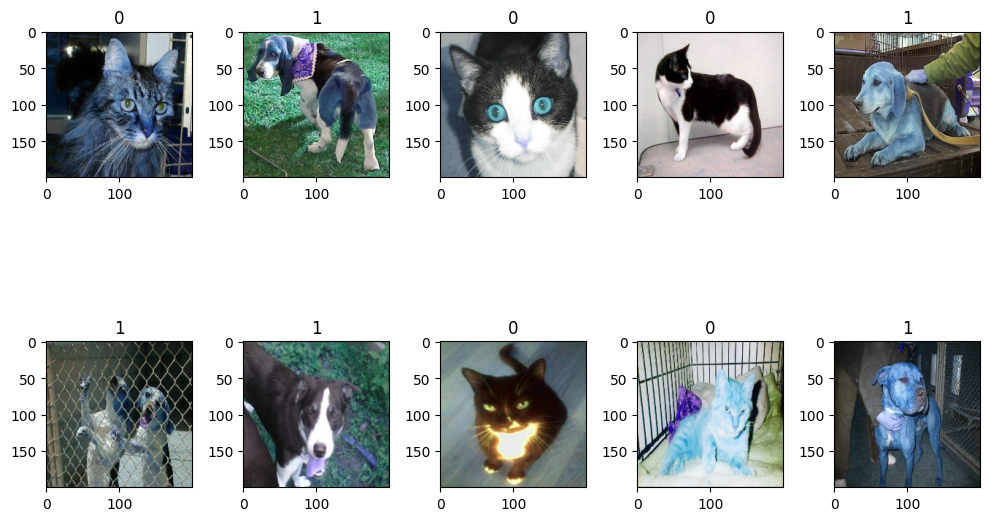

In [124]:
fig, axes= plt.subplots(2, 5, figsize= (10,7))

for i, ax in enumerate(axes.flatten()):
    image = X_train_small[i]   
    ax.imshow(image)                   
    ax.set_title(y_train_small[i])
    
fig.tight_layout()  

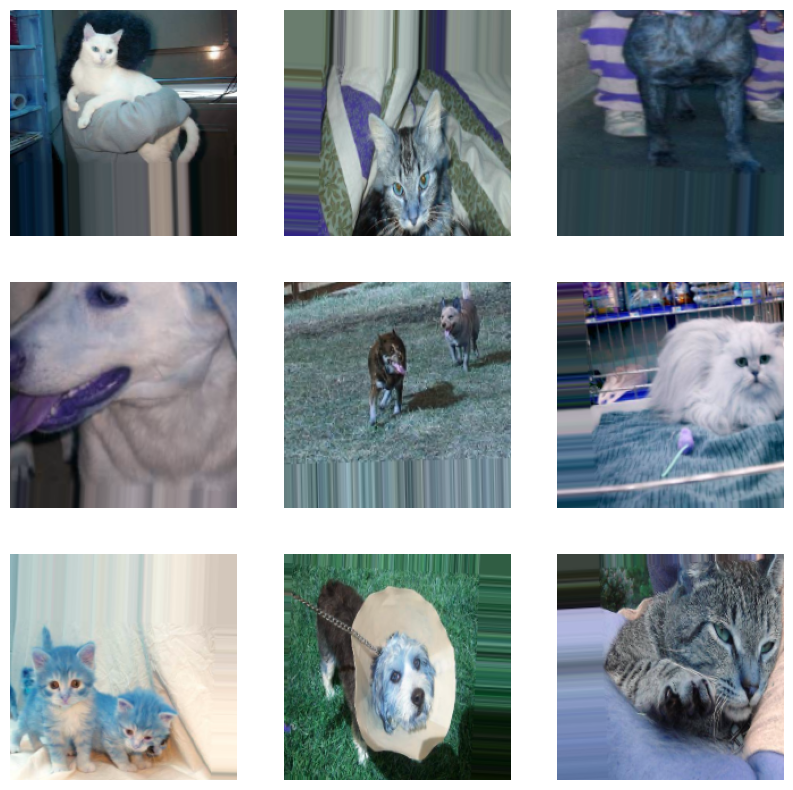

In [125]:
train_datagen = ImageDataGenerator(
    rotation_range=5,
    width_shift_range=0.3,
    height_shift_range=0.2,
    shear_range=0.25,
    zoom_range=0.3,
    horizontal_flip=True,
    fill_mode='nearest'
)

# Skapar en generator från de skalade bilderna
train_datagen.fit(X_train_small)

def visualize_augmented_images(datagen, images, num_images=9):
    plt.figure(figsize=(10, 10))
    for X_batch, _ in datagen.flow(images, np.zeros(len(images)), batch_size=num_images):
        for i in range(0, num_images):
            plt.subplot(3, 3, i + 1)
            plt.imshow(X_batch[i].astype("uint8"))
            plt.axis('off')
        break
    plt.show()

visualize_augmented_images(train_datagen, X_train_small)

2a

In [126]:
X_train_small[1].flatten().min(), X_train_small[1].flatten().max()

(0, 255)

In [127]:
X_train_small = X_train_small.astype('float32') / 255
X_test_small = X_test_small.astype('float32') / 255
X_val_small = X_val_small.astype('float32') / 255

def create_model(input_shape=(200, 200, 3), num_classes=2):
    model = Sequential([
        Conv2D(32, (3, 3), activation='relu', input_shape=input_shape),
        MaxPooling2D((2, 2)),
        Conv2D(64, (3, 3), activation='relu'),
        MaxPooling2D((2, 2)),
        Conv2D(128, (3, 3), activation='relu'),
        MaxPooling2D((2, 2)),
        Flatten(),
        Dense(128, activation='relu'),
        Dropout(0.5),
        Dense(num_classes, activation='softmax')
    ])
    return model

In [128]:
def cnn_model(learning_rate=0.001, dropout_rate=0.3, kernels=[32, 64, 128, 128]):
    adam = Adam(learning_rate=learning_rate)
    model = Sequential(name='CNN_model')

    # Adding layers 
    for kernel in kernels:
        model.add(
            Conv2D(
                kernel,  
                kernel_size=(3, 3),  
                activation='relu', 
                kernel_initializer='he_normal',  # initializing weights
                input_shape=(200, 200, 3) if not model.layers else None
            )
        )
        model.add(MaxPooling2D(pool_size=(2, 2), strides=2))  # subsampling layer

    model.add(Flatten())  # flatten layer
    model.add(Dropout(dropout_rate))  # dropout layer
    model.add(Dense(512, activation='relu', kernel_initializer='he_normal'))  # fully connected layer
    model.add(Dense(1, activation='sigmoid'))  # output layer

    model.compile(loss='binary_crossentropy', optimizer=adam, metrics=['acc'])

    return model

In [129]:
model = cnn_model()
model.summary()

c:\Users\hampu\School\Artificial_Intelligence_Hampus_Erlandsson_OPA23\.venv\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



Model: "CNN_model"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_14 (Conv2D)              │ (None, 198, 198, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_14 (MaxPooling2D) │ (None, 99, 99, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_15 (Conv2D)              │ (None, 97, 97, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_15 (MaxPooling2D) │ (None, 48, 48, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_16 (Conv2D)              │ (None, 46, 46, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_16 (MaxPooling2D) │ (None, 23, 23, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_17 (Conv2D)              │ (None, 21, 21, 128)    │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_17 (MaxPooling2D) │ (None, 10, 10, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_4 (Flatten)             │ (None, 12800)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 12800)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 512)            │     6,554,112 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 1)              │           513 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 6,795,457 (25.92 MB)

 Trainable params: 6,795,457 (25.92 MB)

 Non-trainable params: 0 (0.00 B)

model = create_model()
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])



In [130]:
print(len(X_val_small))
print(len(y_val_small))

396
396


In [131]:
history = model.fit(X_train_small, y_train_small, epochs=10, validation_data=(X_val_small, y_val_small), batch_size=32)

test_loss, test_accuracy = model.evaluate(X_test_small, y_test_small)
print(f"Test Accuracy: {test_accuracy}")

def plot_metrics(metrics):
    _, ax = plt.subplots(1,2, figsize = (12,4))
    metrics[["loss", "val_loss"]].plot(ax = ax[0], title = "Loss", grid = True, xlabel="Epochs", ylabel="Loss")
    metrics[["acc", "val_acc"]].plot(ax = ax[1], title = "Accuracy", grid = True, xlabel="Epochs", ylabel="Loss")




Epoch 1/10
50/50 ━━━━━━━━━━━━━━━━━━━━ 30s 566ms/step - acc: 0.5097 - loss: 2.7471 - val_acc: 0.5480 - val_loss: 0.6840
Epoch 2/10
50/50 ━━━━━━━━━━━━━━━━━━━━ 29s 579ms/step - acc: 0.5632 - loss: 0.6796 - val_acc: 0.5833 - val_loss: 0.6884
Epoch 3/10
50/50 ━━━━━━━━━━━━━━━━━━━━ 36s 730ms/step - acc: 0.5647 - loss: 0.6804 - val_acc: 0.5556 - val_loss: 0.6911
Epoch 4/10
50/50 ━━━━━━━━━━━━━━━━━━━━ 36s 717ms/step - acc: 0.6083 - loss: 0.6552 - val_acc: 0.5253 - val_loss: 0.6978
Epoch 5/10
50/50 ━━━━━━━━━━━━━━━━━━━━ 38s 754ms/step - acc: 0.5913 - loss: 0.6679 - val_acc: 0.5076 - val_loss: 0.7096
Epoch 6/10
50/50 ━━━━━━━━━━━━━━━━━━━━ 34s 688ms/step - acc: 0.6422 - loss: 0.6209 - val_acc: 0.5732 - val_loss: 0.6926
Epoch 7/10
50/50 ━━━━━━━━━━━━━━━━━━━━ 38s 752ms/step - acc: 0.6473 - loss: 0.6092 - val_acc: 0.5404 - val_loss: 0.7465
Epoch 8/10
50/50 ━━━━━━━━━━━━━━━━━━━━ 35s 693ms/step - acc: 0.6903 - loss: 0.5627 - val_acc: 0.5758 - val_loss: 0.7165
Epoch 9/10
50/50 ━━━━━━━━━━━━━━━━━━━━ 34s 678ms/

In [132]:
model.summary()

Model: "CNN_model"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_14 (Conv2D)              │ (None, 198, 198, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_14 (MaxPooling2D) │ (None, 99, 99, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_15 (Conv2D)              │ (None, 97, 97, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_15 (MaxPooling2D) │ (None, 48, 48, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_16 (Conv2D)              │ (None, 46, 46, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_16 (MaxPooling2D) │ (None, 23, 23, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_17 (Conv2D)              │ (None, 21, 21, 128)    │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_17 (MaxPooling2D) │ (None, 10, 10, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_4 (Flatten)             │ (None, 12800)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 12800)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 512)            │     6,554,112 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 1)              │           513 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 20,386,373 (77.77 MB)

 Trainable params: 6,795,457 (25.92 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 13,590,916 (51.85 MB)

In [134]:
metrics = pd.DataFrame(history.history)
metrics.head()

,acc,loss,val_acc,val_loss
0,0.512950,1.414677,0.547980,0.684005
1,0.549589,0.682541,0.583333,0.688365
2,0.567277,0.680209,0.555556,0.691094
3,0.602653,0.658789,0.525253,0.697776
4,0.587492,0.661554,0.507576,0.709614


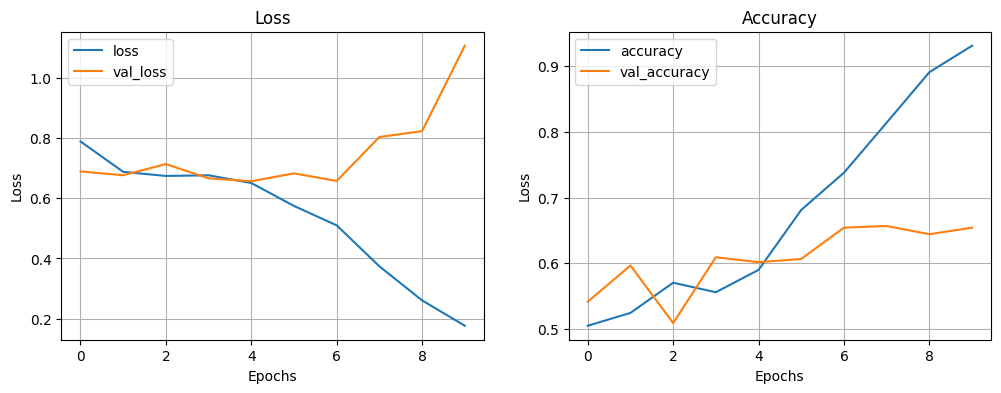

In [ ]:
def plot_metrics(metrics):
    _, ax = plt.subplots(1,2, figsize = (12,4))
    metrics[["loss", "val_loss"]].plot(ax = ax[0], title = "Loss", grid = True, xlabel="Epochs", ylabel="Loss")
    metrics[["accuracy", "val_accuracy"]].plot(ax = ax[1], title = "Accuracy", grid = True, xlabel="Epochs", ylabel="Loss")

plot_metrics(metrics)

16/16 ━━━━━━━━━━━━━━━━━━━━ 2s 126ms/step


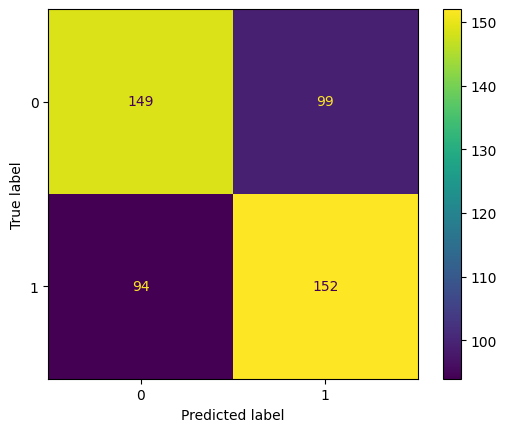

              precision    recall  f1-score   support

     Class 0       0.61      0.60      0.61       248
     Class 1       0.61      0.62      0.61       246

    accuracy                           0.61       494
   macro avg       0.61      0.61      0.61       494
weighted avg       0.61      0.61      0.61       494



In [136]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report
y_pred_prob = model.predict(X_test_small)

# Convert probabilities to binary predictions
y_pred = (y_pred_prob > 0.5).astype(int)

# Create confusion matrix
conf_matrix = confusion_matrix(y_test_small, y_pred)
ConfusionMatrixDisplay(conf_matrix).plot()
plt.show()

# Create classification report 
class_report = classification_report(y_test_small, y_pred, target_names=['Class 0', 'Class 1'])
print(class_report)